<h2> Trabalho prático 3 - Sistemas Fuzzy

Alunos: Lucas Augusto Zanicoski Sergio, Mariany Ferreira da Silva e Mércia de Souza Maguerroski Castilho

<i>Configuracao

In [45]:
%pip install numpy scikit-fuzzy matplotlib

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<h3> Definição do Problema

<i>A UBER está reformulando seu aplicativo para que possa mensurar melhor a qualidade de seus motoristas de acordo com a experiência do cliente.  Para isso, a empresa contratou você para estudar quais aspectos são mais relevantes na avaliação de um motorista e desenvolver um sistema Fuzzy que incorpore o estudo realizado. 

Como requisito, a UBER solicitou que:
A nota final do motorista seja considerada no intervalo de 0 à 5
Sejam consideradas na modelagem no mínimo 4 variáveis linguísticas (sendo uma delas a nota).
Cada variável linguística deve ter no mínimo 3 conjuntos fuzzy.
O sistema deve ter no mínimo 5 regras de inferência. 

O Pesquisador está livre para definir quais variáveis linguísticas serão utilizadas em seu sistema. Estudos sugerem que fatores como “Limpeza do automóvel”, “Educação do motorista”,” Direção Segura”, entre outros, são os pontos mais considerados para avaliar positivamente ou negativamente um motorista.
O Pesquisador está livre para construir as regras de inferência de acordo com a sua experiência. 


<h5> Variáveis Linguísticas e Conjuntos Fuzzy </h5>

<p> As variáveis escolhidas e modeladas de acordo com suas peculiaridades. </p>

* Caminho Escolhido

Para variável Caminho Escolhido, utilizou-se o intervalo de 0 a 10 com funções Triangulares para as classificações "ruim" ou "médio" e Sigmoidal para classificações "bom", fazendo com que notas que tendem a ser maiores tenham uma curva mais suave no grafico .

In [46]:
caminho_escolhido = ctrl.Antecedent(np.arange(0,10,0.2),'caminho_escolhido')

In [47]:
caminho_escolhido['ruim']=fuzz.trimf(caminho_escolhido.universe,[0,0,5])
caminho_escolhido['médio']=fuzz.trimf(caminho_escolhido.universe,[2,5,8])
caminho_escolhido['bom']=fuzz.sigmf(caminho_escolhido.universe, 7, 2)

/home/bacon/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


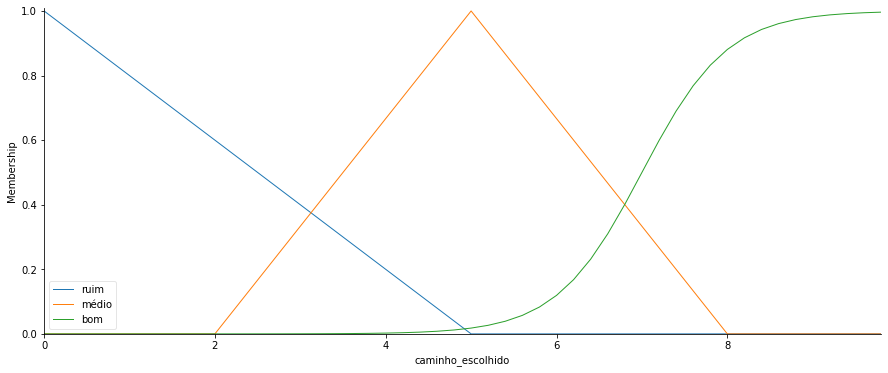

In [48]:
caminho_escolhido.view()

* Cordialidade

Para variável Cordialidade, utilizou-se o intervalo de notas entre 0 a 10 com uma função Triangular para as classificações "ruim", Gaussian para classificações "média" com pico em 5 e sigma de 0.5 o que faz com que haja um pico significativo nessa area do grafico e Sigmoidal para classificações "bom", fazendo com que notas que tendem a ser maiores a partir de 6 tenham uma curva mais suave no grafico, consequentimente uma area maior.

In [49]:
cordialidade = ctrl.Antecedent(np.arange(0,10,0.2),'cordialidade')

In [50]:
cordialidade['baixa']=fuzz.trimf(cordialidade.universe,[0,0,5])
cordialidade['média']=fuzz.gaussmf(cordialidade.universe, 5, 0.5)
cordialidade['alta']=fuzz.sigmf(cordialidade.universe, 7, 2)

/home/bacon/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


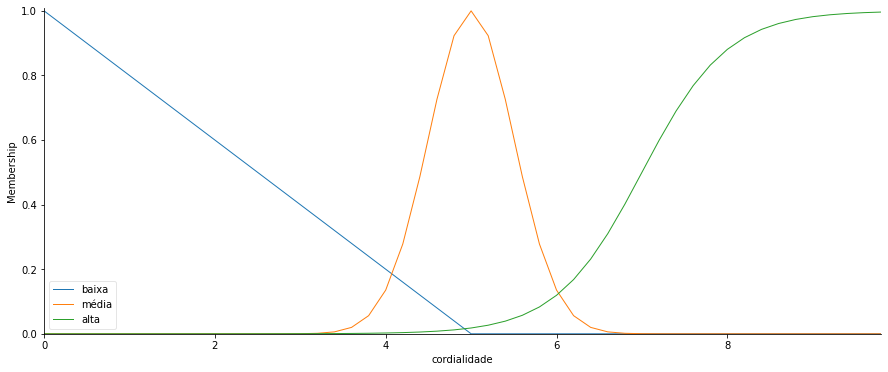

In [51]:
cordialidade.view()

* Direcao

Para variável Direcao, utilizou-se o intervalo de 0 a 10 com funções Triangulares para as classificações "ruim" ou "médio" e Sigmoidal para classificações "bom", fazendo com que notas que tendem a ser maiores tenham uma curva mais suave no grafico.

In [52]:
direcao = ctrl.Antecedent(np.arange(0,10,0.2),'direcao')

In [53]:
direcao['ruim']=fuzz.trimf(direcao.universe,[0,0,5])
direcao['média']=fuzz.trimf(direcao.universe,[0,5,10])
direcao['boa']=fuzz.sigmf(direcao.universe, 7, 2)

/home/bacon/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


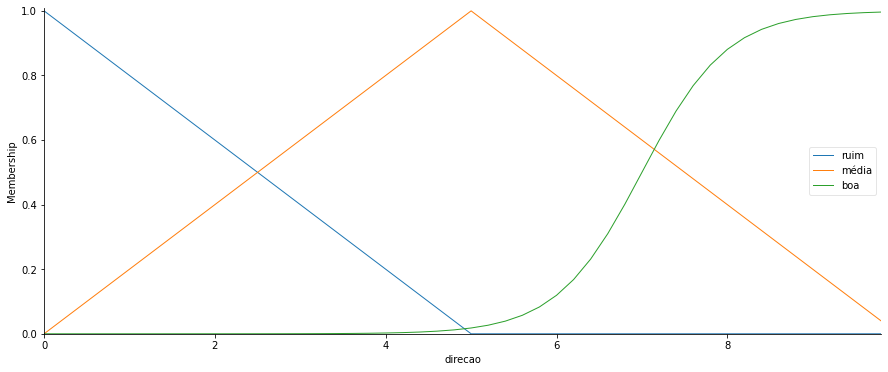

In [54]:
direcao.view()

* Nota

Para variável Nota, utilizou-se o intervalo de 0 a 5 com uma funçao Triangular para as classificações "ruim" com pico em 0 descrescendo até 2, Gaussina para notas "médio" e novamente Triangular para classificações "bom", com crescente em 4 e pico em 5 fazendo com que as areas do grafico ficassem bem divididas.

In [55]:
nota = ctrl.Consequent(np.arange(1,5,0.1),'nota')

In [56]:
nota['baixa']=fuzz.trimf(nota.universe,[0,1,2])
print(nota.universe)
nota['média']=fuzz.gaussmf(nota.universe, 3, 0.3)
nota['alta']=fuzz.trimf(nota.universe,[4,5,5])

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9]


/home/bacon/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


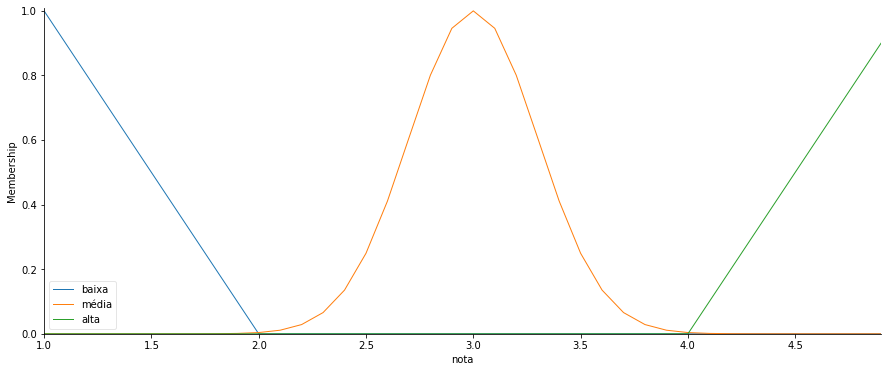

In [57]:
nota.view()

<h5> Regras de inferencia

Considerando as variáveis:

* Caminho escolhido
* Cordialidade
* Direcao

In [58]:
rule1=ctrl.Rule(direcao['ruim'] & caminho_escolhido['ruim'] & cordialidade['baixa'], nota['baixa'])
rule2=ctrl.Rule(direcao['ruim'] & caminho_escolhido['ruim'] & cordialidade['média'], nota['baixa'])
rule3=ctrl.Rule(direcao['ruim'] & caminho_escolhido['médio'] & cordialidade['alta'], nota['média'])
rule4=ctrl.Rule(direcao['ruim'] & caminho_escolhido['médio'] & cordialidade['baixa'], nota['baixa'])
rule5=ctrl.Rule(direcao['média'] & caminho_escolhido['bom'] & cordialidade['média'], nota['média'])
rule6=ctrl.Rule(direcao['média'] & caminho_escolhido['bom'] & cordialidade['alta'], nota['alta'])
rule7=ctrl.Rule(direcao['média'] & caminho_escolhido['ruim'] & cordialidade['baixa'], nota['baixa'])
rule8=ctrl.Rule(direcao['média'] & caminho_escolhido['ruim'] & cordialidade['média'], nota['média'])
rule9=ctrl.Rule(direcao['boa'] & caminho_escolhido['médio'] & cordialidade['alta'], nota['alta'])
rule10=ctrl.Rule(direcao['boa'] & caminho_escolhido['médio'] & cordialidade['baixa'], nota['média'])
rule11=ctrl.Rule(direcao['boa'] & caminho_escolhido['bom'] & cordialidade['média'], nota['alta'])
rule12=ctrl.Rule(direcao['boa'] & caminho_escolhido['bom'] & cordialidade['alta'], nota['alta'])

In [59]:
agreg=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6, rule7, rule8, rule9,rule10,rule11,rule12])

In [60]:
controle=ctrl.ControlSystemSimulation(agreg)

<h5> Execução

In [61]:
controle.input['direcao']=10
controle.input['caminho_escolhido']=8
controle.input['cordialidade']=9
controle.compute()

In [62]:
print(controle.output['nota'])

4.59986627827005


/home/bacon/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


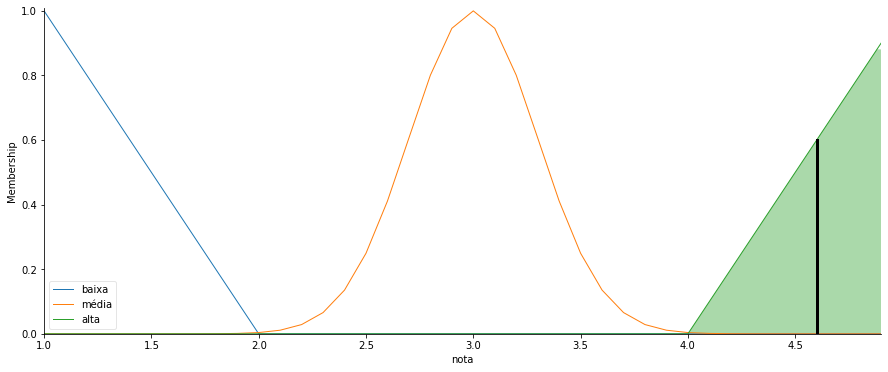

In [63]:
nota.view(sim=controle)

A nota obtida foi 4.59, pode-se perceber a parte ativada do gráfico é a que corresponde a notas altas, já que as notas para as variáveis foram acima de 7

In [64]:

controle.input['direcao']=5
controle.input['caminho_escolhido']=7
controle.input['cordialidade']=2

controle.compute()

In [65]:
print(controle.output['nota'])

3.0010848985853564


/home/bacon/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


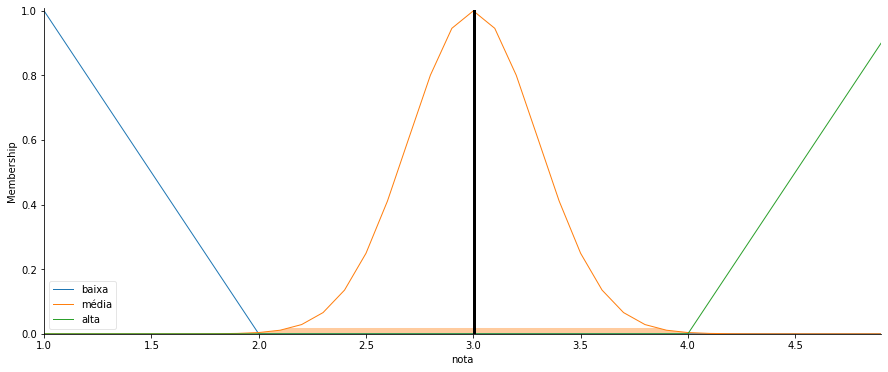

In [66]:
nota.view(sim=controle)

A nota obtida foi 3.00, pode-se perceber a parte ativada do gráfico é a que corresponde a notas médias, mas ela aparece em pequena proporção ativa, poisnas nossas regras não existe um caso que se encaixe com as notas para as variáveis escolhidas. Queremos deixar explicito esse comportamento pois, para fazer com que o modelo fique mais acertado precisaríamos mudar as regras, adicionando caso onde:

NewRule=ctrl.Rule(direcao['média'] & caminho_escolhido['médio'] & cordialidade['baixa'], nota['média'])

Teríamos a região pintada no grafico com uma area maior. Vamos ajustar as regras a seguir e ver a diferença no grafico:

In [74]:
NewRule=ctrl.Rule(direcao['média'] & caminho_escolhido['médio'] & cordialidade['baixa'], nota['média'])


In [ ]:
agreg=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6, rule7, rule8, rule9,rule10,rule11,rule12, NewRule])


In [ ]:
controle=ctrl.ControlSystemSimulation(agreg)

In [75]:
controle.input['direcao']=5
controle.input['caminho_escolhido']=7
controle.input['cordialidade']=2

controle.compute()

In [76]:
print(controle.output['nota'])

3.000092404205891


/home/bacon/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


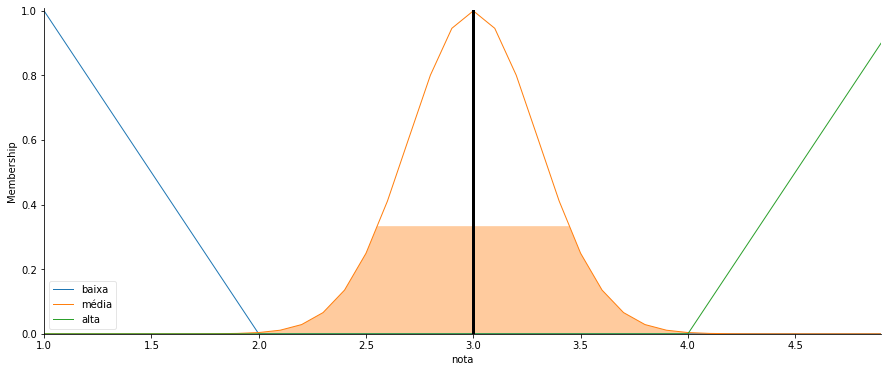

In [77]:
nota.view(sim=controle)

Com o ajuste nas regras a area ativada no grafico é significativamente maior.

In [78]:

controle.input['direcao']=6
controle.input['caminho_escolhido']=8
controle.input['cordialidade']=6
controle.compute()

In [79]:
print(controle.output['nota'])

3.496377025829461


/home/bacon/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


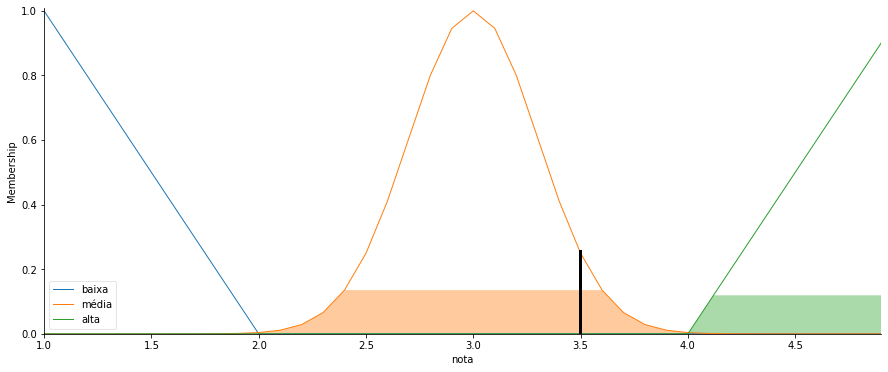

In [80]:
nota.view(sim=controle)

A nota obtida foi 3.49, pode-se perceber a parte ativada do gráfico é a que corresponde a notas médias, mas ela aparece em pequena proporção ativa, pois o caminho_escolhido ter recebido nota 8 influencia no resultado, fazendo com que uma area do grafico de média "alta" seja ativada.